In [7]:
import numpy as np
import pandas as pd

#a) read csv and store it in a variable
student_df = pd.read_csv("dataSet/StudentsPerformance.csv")

#b) Display header rows and description of the loaded dataSet 
print(student_df.head(5))

#c) remove unwanted features such as lunch and test preperation course
student_df.drop(['lunch','test preparation course'], axis = 1, inplace = True)
print(student_df.head(5))

#d) Replace Nan in parental level of education with a default value
student_df["parental level of education"] = student_df["parental level of education"].fillna("YYY")
print(student_df.head(5))

#e) change the group a, b in race/ethnicity to valid names
student_df ['race/ethnicity'] = student_df ['race/ethnicity'].map({
    'group A': 'Asian Students',
    'group B': 'African Students',
    'group C': 'Afro-Asian Students',
    'group D': 'American Students',
    'group E': 'European Students'
})
print(student_df.head(5))


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                         NaN      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                         NaN      standard   

  test preparation course  mathscore  reading score  writing score  
0                    none         72             72             74  
1               completed         69             90             88  
2                    none         90             95             93  
3                    none         47             57             44  
4                    none         76             78             75  
   gender race/ethnicity parental level of education  mathscore  \
0  female        group B           bachelor's degree         72   
1  female        group C       

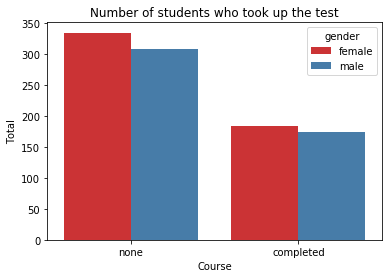

In [19]:
#f) Visualization
# i) Tally the number of male and female students who took up the test preparation course and those who did not
import seaborn as sns
import matplotlib.pyplot as plt

student_df = pd.read_csv("dataSet/StudentsPerformance.csv")

ax = sns.countplot(x = 'test preparation course', hue = 'gender', palette = 'Set1',data = student_df)
ax.set(title = 'Number of students who took up the test',
       xlabel = 'Course', ylabel = 'Total')
plt.show()

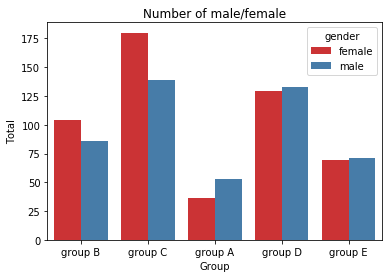

In [5]:
#ii) Total number of male and female students belonging to each student group
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

student_df = pd.read_csv("dataSet/StudentsPerformance.csv")

ax = sns.countplot(x = 'race/ethnicity', hue = 'gender', palette = 'Set1',data = student_df)
ax.set(title = 'Number of male/female',
       xlabel = 'Group', ylabel = 'Total')
plt.show()

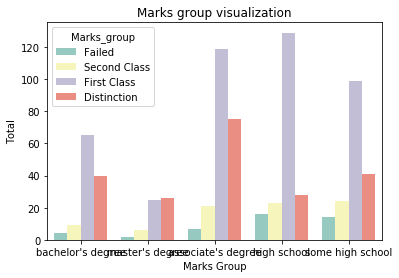

In [9]:
#iii) Number of students who failed(<40), second class(between 40 and 50), first class (between 60 and 75), destinction (>75) in math reading and writing

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

student_df = pd.read_csv("dataSet/StudentsPerformance.csv")

student_df.drop(['lunch','test preparation course','gender', 'race/ethnicity'], axis = 1, inplace = False)

interval = (0,40,50,75,110)
cat = ['Failed','Second Class','First Class', 'Distinction']
student_df['Marks_group'] = pd.cut(student_df['mathscore'], interval, labels = cat)

ax = sns.countplot(x = 'parental level of education',  data = student_df, hue = 'Marks_group', palette = 'Set3')

ax.set(xlabel='Marks Group', ylabel='Total',
       title="Marks group visualization")
plt.show()